# Aplicando o modelo SARIMA 

 - SARIMA_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

- importando os dados dos crimes sexuais

In [3]:
crimes_sexuais = pd.read_csv('crimes_sexuais.csv')

In [4]:
crimes_sexuais.head()

,data_da_ocorrencia,crimes_sexuais
0,2014-01-01,43
1,2014-01-02,5
2,2014-01-03,3
3,2014-01-04,3
4,2014-01-05,8


 - convertendo as coluna data para Datetime

In [5]:
crimes_sexuais['data_da_ocorrencia'] = pd.to_datetime(crimes_sexuais['data_da_ocorrencia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [6]:
crimes_sexuais = crimes_sexuais.query(' data_da_ocorrencia >= "2014-01-01"')

In [7]:
crimes_sexuais['data_da_ocorrencia'].dt.year.value_counts()

2015    365
2014    365
Name: data_da_ocorrencia, dtype: int64

 - Definindo a data como índice

In [8]:
crimes_sexuais = crimes_sexuais.set_index('data_da_ocorrencia')

 - Graficando "crimes_sexuais"

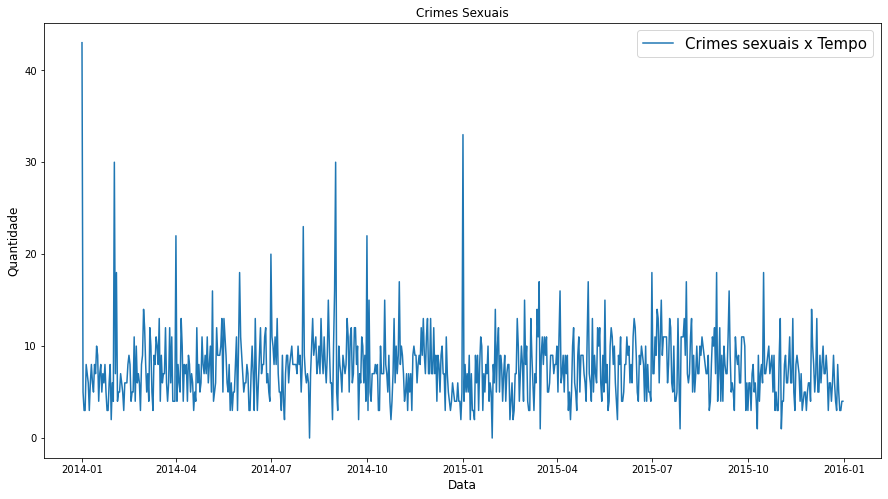

In [9]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

In [10]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].index.values
t_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].index.values
X_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].values
X_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].values

- ACF e PACF

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

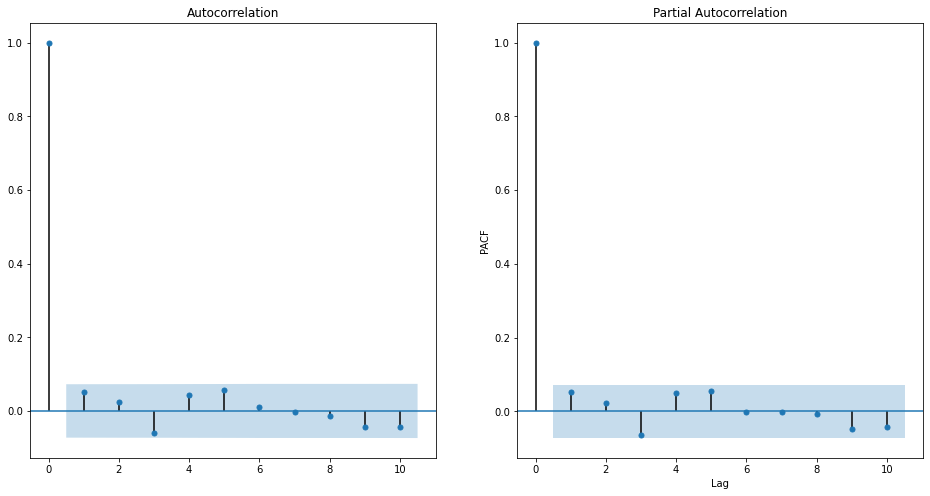

In [12]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
plot_acf(crimes_sexuais.values, lags= 10,ax=ax[0] )
plot_pacf(crimes_sexuais.values, lags = 10, ax=ax[1])
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

- Aplicando o modelo auto regressivo

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
modelo = SARIMAX(X_treino,order=(1,1,1), seasonal_order=(0,1,2,12))
resultado = modelo.fit()

 - Coeficientes

In [15]:
print('Coefficients: %s' % resultado.params)

Coefficients: [ 0.0246714  -0.99257343 -0.91075295 -0.04348082 17.65120729]


 - Fazendo as predições

In [16]:
import datetime as dt

In [17]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

 - Calculando erros

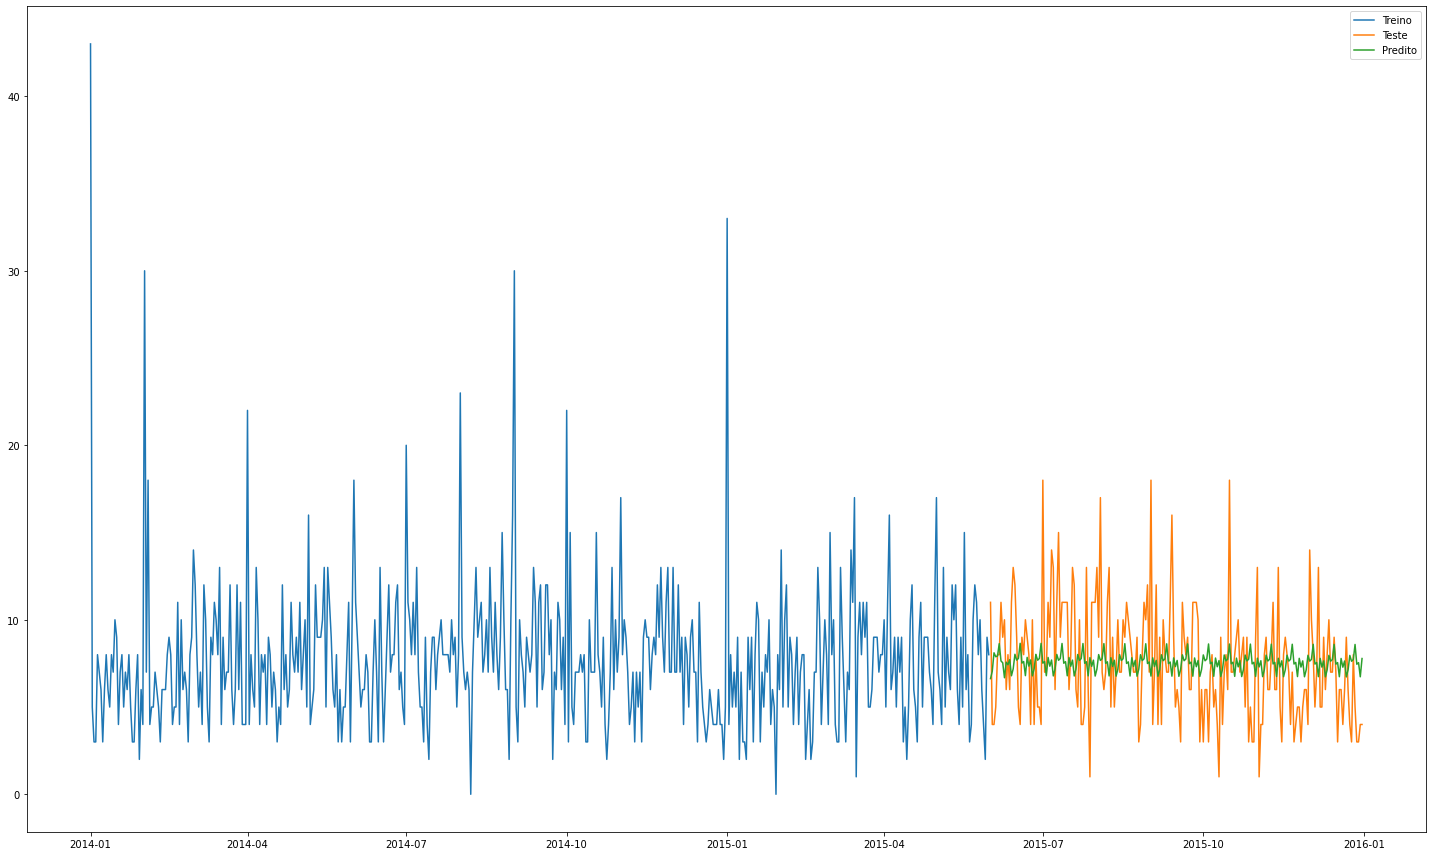

In [18]:
plt.figure(figsize=(20,12))
plt.plot(t_treino,X_treino,label='Treino')
plt.plot(t_teste,X_teste,label='Teste')
plt.plot(t_teste,X_pred,label='Predito')
plt.legend()
plt.tight_layout()

 - calculando erros

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
MSE = mean_squared_error(X_teste,X_pred)

In [21]:
RMSE = np.sqrt(MSE)

In [22]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.35
